<a href="https://colab.research.google.com/github/Yuyi5la/African-Western-Fabric-Image-Recognition/blob/main/Af_img_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

In [ ]:
import tensorflow as tf
import os

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU available: []


# **UPLOAD DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Mounted at /content/drive


# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

<ipython-input-4-290956b76b78>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = '/content/drive/MyDrive/dataset'

In [ ]:
image_exts = ['jpeg','jpg', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dataset')

Found 1194 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

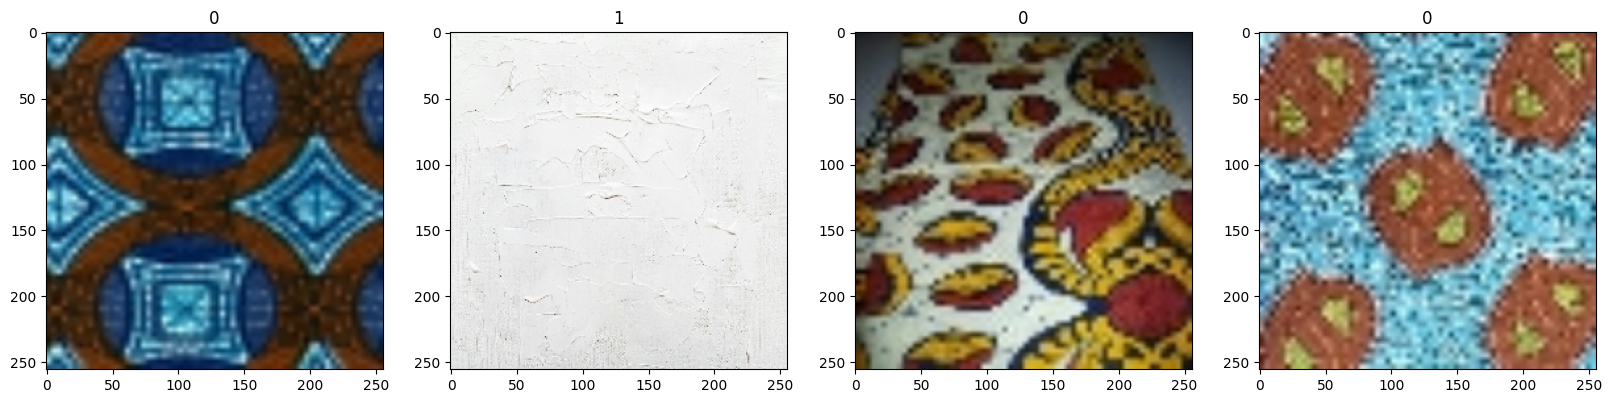

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#class 1 = weatern fabric
#class 0 = african fabric

# **Preprocess Data**

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[7.84313753e-02, 5.88235296e-02, 3.52941193e-02],
          [7.84313753e-02, 5.88235296e-02, 3.52941193e-02],
          [7.89215714e-02, 5.93137257e-02, 3.57843153e-02],
          ...,
          [9.65686291e-02, 8.08823556e-02, 3.87254916e-02],
          [9.80392173e-02, 8.23529437e-02, 3.92156877e-02],
          [9.80392173e-02, 8.23529437e-02, 3.92156877e-02]],
 
         [[7.84313753e-02, 5.88235296e-02, 3.52941193e-02],
          [7.84313753e-02, 5.88235296e-02, 3.52941193e-02],
          [7.89215714e-02, 5.93137257e-02, 3.57843153e-02],
          ...,
          [9.65686291e-02, 8.08823556e-02, 3.87254916e-02],
          [9.80392173e-02, 8.23529437e-02, 3.92156877e-02],
          [9.80392173e-02, 8.23529437e-02, 3.92156877e-02]],
 
         [[7.89215714e-02, 5.93137257e-02, 3.57843153e-02],
          [7.89215714e-02, 5.93137257e-02, 3.57843153e-02],
          [7.94117674e-02, 5.98039217e-02, 3.62745114e-02],
          ...,
          [9.84681398e-02, 8.27818662e-02, 4.0624

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [ ]:
len(data)

38

In [ ]:
train_size

26

In [ ]:
val_size

8

In [ ]:
test_size

3

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [ ]:
import tensorflow as tf
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.5727 - loss: 1.0997 - val_accuracy: 0.7383 - val_loss: 0.5641
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.7673 - loss: 0.5006 - val_accuracy: 0.8242 - val_loss: 0.3742
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - accuracy: 0.9000 - loss: 0.2826 - val_accuracy: 0.9531 - val_loss: 0.1655
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9437 - loss: 0.1680 - val_accuracy: 0.9453 - val_loss: 0.1519
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9281 - loss: 0.1719 - val_accuracy: 0.9570 - val_loss: 0.1835
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9478 - loss: 0.1811 - val_accuracy: 0.9297 - val_loss: 0.1505
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9717 - loss: 0.0853 - val_accuracy: 0.9492 - val_loss: 0.1068
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.9793 - loss: 0.0627 - val_accuracy: 0.9648 - v

# 8. Plot Performance

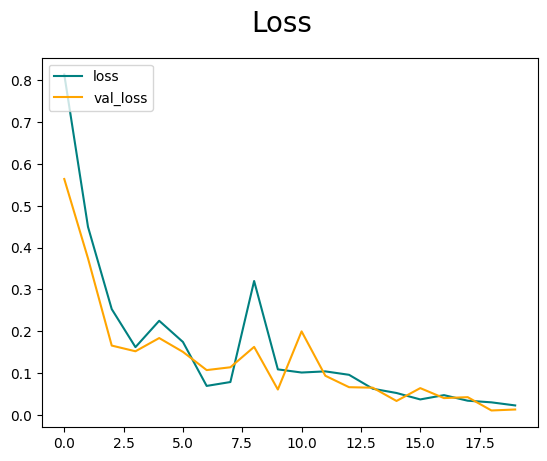

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

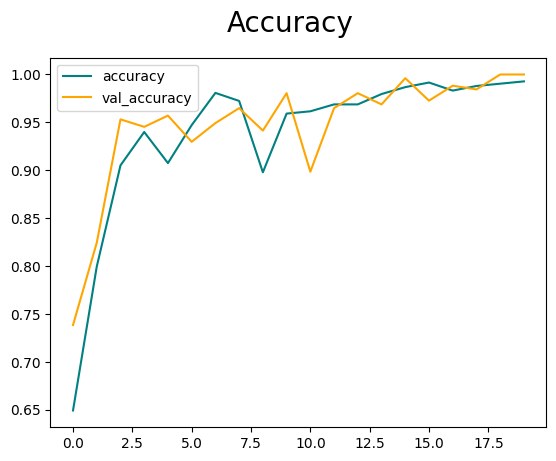

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [48]:
import cv2
import matplotlib.pyplot as plt

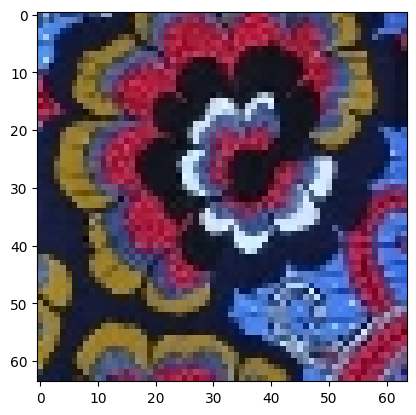

In [49]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/1056.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

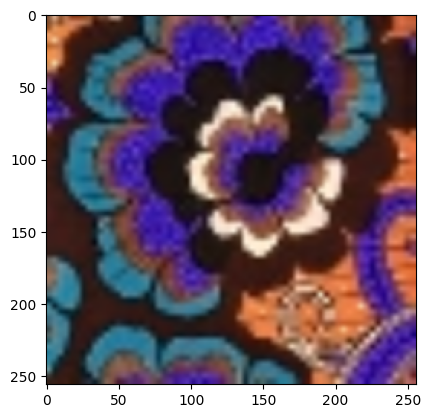

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [52]:
yhat

array([[0.17413327]], dtype=float32)

In [53]:
if yhat > 0.5:
    print("Predicted class is WESTERN FABRIC")
else:
    print("Predicted class is AFRICAN FABRIC")


Predicted class is AFRICAN FABRIC


# 11. Save the Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('/content/drive/MyDrive/Saved_Models/imageclassifier.keras')

In [56]:
new_model = load_model('/content/drive/MyDrive/Saved_Models/imageclassifier.keras')


In [57]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[0.17413327]], dtype=float32)